# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | la'ie
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | ostersund
Processing Record 5 of Set 1 | sovetskaya gavan'
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | pirallahi
Processing Record 8 of Set 1 | sungai besar
Processing Record 9 of Set 1 | obala
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | andradas
Processing Record 15 of Set 1 | todos santos
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | taro
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | bogale
Processing Record 22 of Set 1 | adamstown
Process

Processing Record 41 of Set 4 | trincomalee
Processing Record 42 of Set 4 | joshimath
Processing Record 43 of Set 4 | bamboo flat
Processing Record 44 of Set 4 | dubrovnik
Processing Record 45 of Set 4 | el bauga
Processing Record 46 of Set 4 | tofol
Processing Record 47 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | burang
Processing Record 0 of Set 5 | pangody
Processing Record 1 of Set 5 | coronel dorrego
Processing Record 2 of Set 5 | inari
Processing Record 3 of Set 5 | dudinka
Processing Record 4 of Set 5 | duong dong
Processing Record 5 of Set 5 | airuk
Processing Record 6 of Set 5 | hermanus
Processing Record 7 of Set 5 | shambu
Processing Record 8 of Set 5 | antalaha
Processing Record 9 of Set 5 | karapinar
Processing Record 10 of Set 5 | iskateley
Processing Record 11 of Set 5 | karratha
Processing Record 12 of Set 5 | severo-yeniseyskiy
Processing Record 13 of Set 5 | baruun-urt
Processing Record 14 of 

Processing Record 30 of Set 8 | barah
Processing Record 31 of Set 8 | codrington
Processing Record 32 of Set 8 | axum
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | zaranj
Processing Record 35 of Set 8 | an nuhud
Processing Record 36 of Set 8 | forres
Processing Record 37 of Set 8 | darwin
Processing Record 38 of Set 8 | pozo del molle
Processing Record 39 of Set 8 | luena
Processing Record 40 of Set 8 | long beach
Processing Record 41 of Set 8 | takoradi
Processing Record 42 of Set 8 | kourou
Processing Record 43 of Set 8 | najran
Processing Record 44 of Set 8 | holbrook
Processing Record 45 of Set 8 | grand-bassam
Processing Record 46 of Set 8 | scone
Processing Record 47 of Set 8 | mammoth lakes
Processing Record 48 of Set 8 | burutu
Processing Record 49 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 0 of Set 9 | fale old settlement
Processing Record 1 of Set 9 | ploudalmezeau
Processing Record 2 of Set 9 | smithers
Processing Record 3

Processing Record 22 of Set 12 | balykchy
Processing Record 23 of Set 12 | tinajo
Processing Record 24 of Set 12 | wynyard
Processing Record 25 of Set 12 | piacabucu
Processing Record 26 of Set 12 | kingsford
Processing Record 27 of Set 12 | popondetta
Processing Record 28 of Set 12 | balnearia
Processing Record 29 of Set 12 | new yekepa
Processing Record 30 of Set 12 | ortona
Processing Record 31 of Set 12 | eastham
Processing Record 32 of Set 12 | cambridge
Processing Record 33 of Set 12 | shahrak
Processing Record 34 of Set 12 | nuku'alofa
Processing Record 35 of Set 12 | karmala
Processing Record 36 of Set 12 | kamaishi
Processing Record 37 of Set 12 | peace river
Processing Record 38 of Set 12 | hastings
Processing Record 39 of Set 12 | lichinga
Processing Record 40 of Set 12 | ta`u
Processing Record 41 of Set 12 | vila franca do campo
Processing Record 42 of Set 12 | mangrol
Processing Record 43 of Set 12 | beteza
City not found. Skipping...
Processing Record 44 of Set 12 | kulhu

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,6.00,93,100,0.89,US,1701666136
1,la'ie,21.6477,-157.9253,26.98,82,17,0.89,US,1701666283
2,margaret river,-33.9500,115.0667,19.20,61,100,4.91,AU,1701666283
3,ostersund,63.1792,14.6357,-13.55,85,86,6.71,SE,1701666152
4,sovetskaya gavan',48.9723,140.2878,-2.72,59,100,0.33,RU,1701666283


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,6.00,93,100,0.89,US,1701666136
1,la'ie,21.6477,-157.9253,26.98,82,17,0.89,US,1701666283
2,margaret river,-33.9500,115.0667,19.20,61,100,4.91,AU,1701666283
3,ostersund,63.1792,14.6357,-13.55,85,86,6.71,SE,1701666152
4,sovetskaya gavan',48.9723,140.2878,-2.72,59,100,0.33,RU,1701666283


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

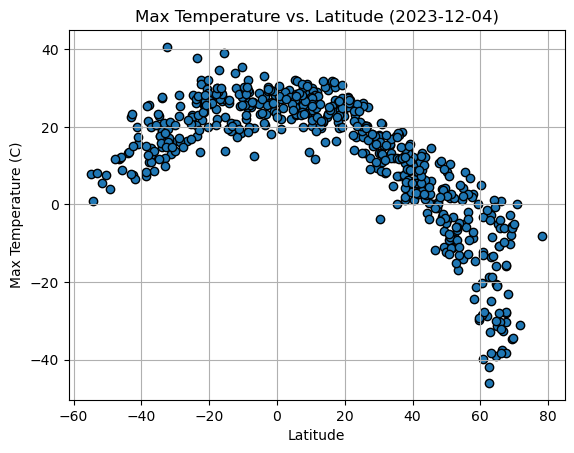

In [40]:
# Build scatter plot for latitude vs. temperature
lat_scatter = city_data_df['Lat']
temp_scatter = city_data_df['Max Temp']
lat_temp_scatter = plt.scatter(lat_scatter, temp_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
import datetime
unix_time = city_data_df['Date'].median()
time_converting = datetime.datetime.fromtimestamp(unix_time)
figure_date = time_converting.strftime('%Y-%m-%d')
title = f'Max Temperature vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

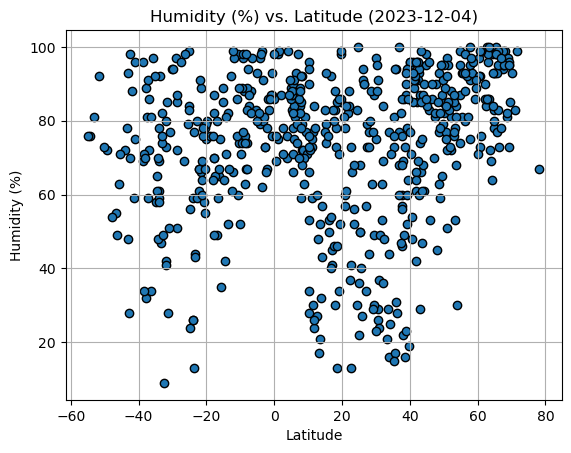

In [41]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter = city_data_df['Humidity']
lat_humidity_scatter = plt.scatter(lat_scatter, humidity_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Humidity (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

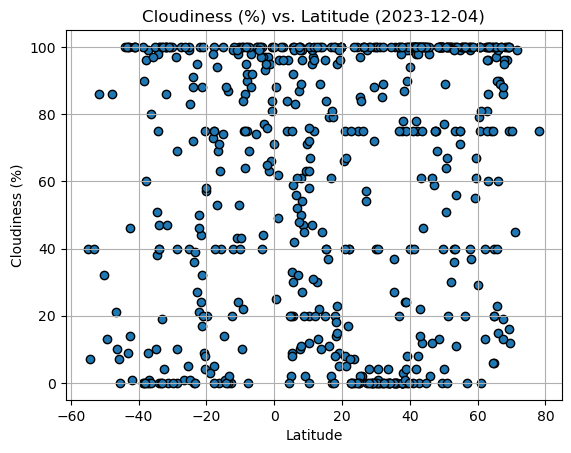

In [42]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_scatter = city_data_df['Cloudiness']
lat_cloud_scatter = plt.scatter(lat_scatter, cloudiness_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Cloudiness (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

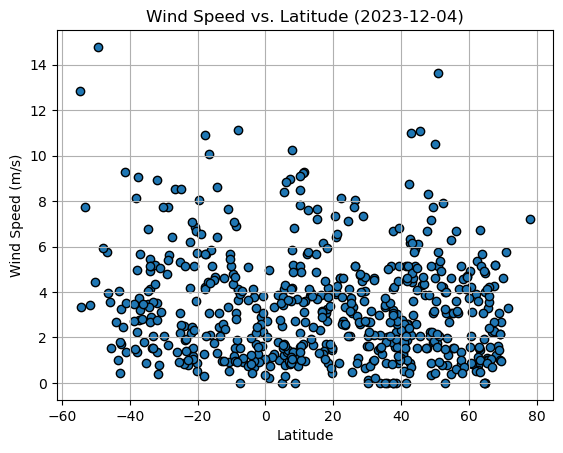

In [43]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter = city_data_df['Wind Speed']
lat_wind_scatter = plt.scatter(lat_scatter, wind_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties

title = f'Wind Speed vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,6.00,93,100,0.89,US,1701666136
1,la'ie,21.6477,-157.9253,26.98,82,17,0.89,US,1701666283
3,ostersund,63.1792,14.6357,-13.55,85,86,6.71,SE,1701666152
4,sovetskaya gavan',48.9723,140.2878,-2.72,59,100,0.33,RU,1701666283
6,pirallahi,40.4723,50.3330,10.08,71,40,2.55,AZ,1701666284


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,19.20,61,100,4.91,AU,1701666283
5,port-aux-francais,-49.3500,70.2167,3.88,72,13,14.78,TF,1701666284
9,bredasdorp,-34.5322,20.0403,17.66,65,51,3.48,ZA,1701666285
11,waitangi,-43.9535,-176.5597,13.23,72,100,2.68,NZ,1701666285
13,andradas,-22.0681,-46.5692,21.78,67,21,1.43,BR,1701666285


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8864585463767228


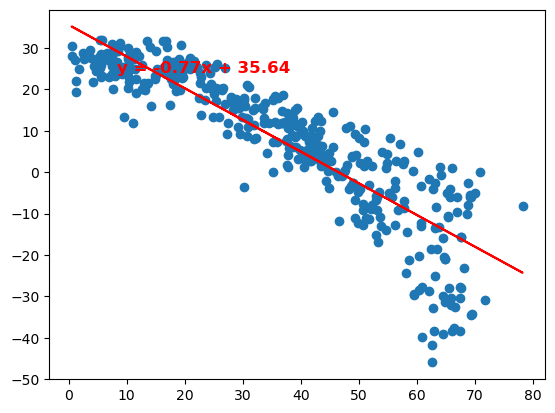

In [47]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.show()

The r-value is: 0.6567594368316881


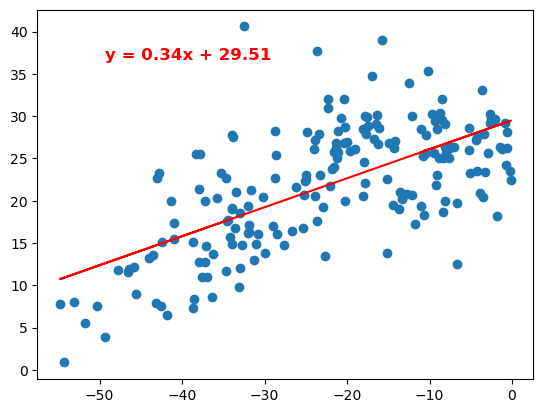

In [48]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.show()

**Discussion about the linear relationship:**   
For the Northern Hemisphere, the high 'r' value indicates a strong negative correlation of Max Temperatures and Latitude. As the datapoints move north from the equator, max temperatures reduce.
The 'r' value for the Southern Hemisphere has a moderate positive correlation of Max Temperature and Latitude.  As the datapoints move south from the equator, max tempartures reduce.
There are linear correlations of max tempertures and latitudes after separting datapoints above and below the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2958481789182938


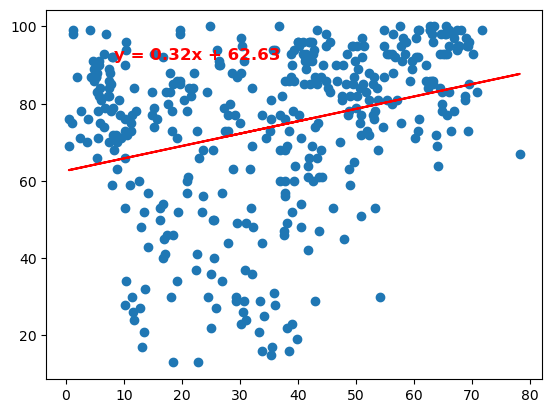

In [49]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.show()

The r-value is: 0.24757140049963103


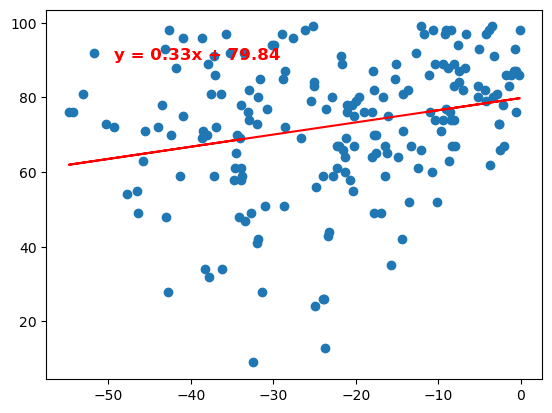

In [50]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Humidity, are less than 0.3. This indicates no or a very weak correlation of Latitude and Humidity.  Latitude and Humidity do not appear to have a linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18386219708119433


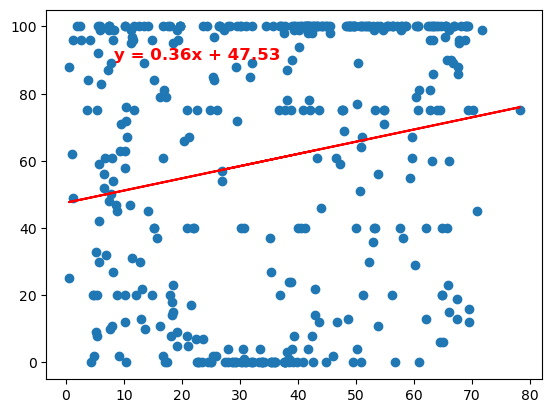

In [51]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.show()

The r-value is: 0.2617813015115136


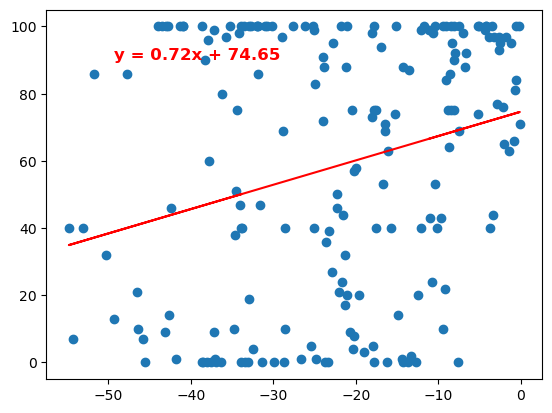

In [52]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Cloudiness, are less than 0.3. This indicates no or a very weak correlation of Latitude and Cloudiness. Latitude and Cloudiness do not appear to have a linear relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05597165682825378


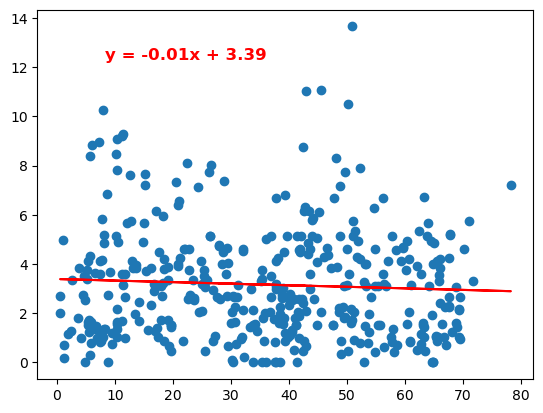

In [53]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.show()

The r-value is: -0.2245887984193691


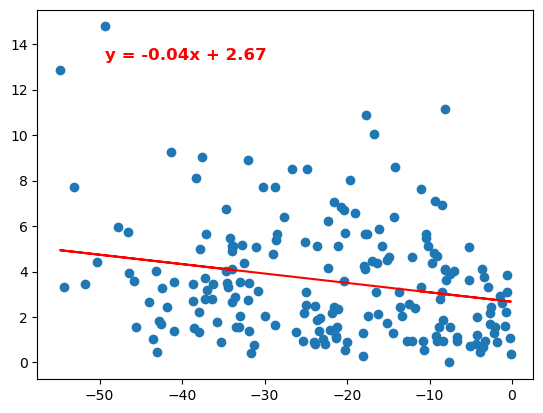

In [54]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Wind Speed, are less than 0.3. This indicates no or a very weak correlation of Latitude and Wind Speed.  Latitude and Wind Speed do not appear to have a linear relationship. 